# Data Understanding

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency

df = pd.read_csv("data/smoker_train.csv")

## Allgemeine Analyse

In [ ]:
df.head()

In [ ]:
df.info()

## Merkmale

### Personendaten

In [ ]:
# Smoking
smoking_counts = df["smoking"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(smoking_counts, labels=smoking_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.legend(title="Smoking", labels=["Non-Smoker", "Smoker"])
plt.tight_layout()
plt.show()

In [ ]:
# Age
plt.figure(figsize=(8, 4))
age_count = df['age'].value_counts().sort_index()
plt.bar(age_count.index, age_count.values, width=2)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [ ]:
# Scatter plot: height vs weight
plt.figure(figsize=(8, 4))
plt.scatter(df['height(cm)'], df['weight(kg)'], alpha=0.3)
plt.title('Height vs Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In [ ]:
# Boxplot of weight by smoking status
df.boxplot(column='weight(kg)', by='smoking')
plt.title('Weight by Smoking Status')
plt.suptitle('')
plt.xlabel('Smoking')
plt.ylabel('Weight (kg)')
plt.show()

### Gesundheitswerte

In [ ]:
# Create the data for the table
data = {
    "Intervall": ["[0, 1)", "[1, 2)", "[2, 3)", "[3, 9)", "[9, 10]"],
    "Eyesight (left)": [
        df[(df['eyesight(left)'] >= 0) & (df['eyesight(left)'] < 1)].shape[0],
        df[(df['eyesight(left)'] >= 1) & (df['eyesight(left)'] < 2)].shape[0],
        df[(df['eyesight(left)'] >= 2) & (df['eyesight(left)'] < 3)].shape[0],
        df[(df['eyesight(left)'] >= 3) & (df['eyesight(left)'] < 9)].shape[0],
        df[(df['eyesight(left)'] >= 9) & (df['eyesight(left)'] < 10)].shape[0]
    ],
    "Eyesight (right)": [
        df[(df['eyesight(right)'] >= 0) & (df['eyesight(right)'] < 1)].shape[0],
        df[(df['eyesight(right)'] >= 1) & (df['eyesight(right)'] < 2)].shape[0],
        df[(df['eyesight(right)'] >= 2) & (df['eyesight(right)'] < 3)].shape[0],
        df[(df['eyesight(right)'] >= 3) & (df['eyesight(right)'] < 9)].shape[0],
        df[(df['eyesight(right)'] >= 9) & (df['eyesight(right)'] <= 10)].shape[0]
    ]
}

# Create DataFrame
eyesight_df = pd.DataFrame(data)

# Print the table
print(eyesight_df.to_string(index=False))

### Laborwerte

In [ ]:
# Urin Protein Verteilung
df_urine = pd.read_csv("data/smoker_train.csv", usecols=["Urine protein"])
urine_counts = df_urine["Urine protein"].value_counts().sort_index()
print(urine_counts)

## Lage- und Steuungsmaße

In [ ]:
lagemasse = df.describe().transpose()

lagemasse["rel. diff"] = (lagemasse["mean"]-lagemasse["50%"])/lagemasse["mean"]

lagemasse

## Korrelation

In [42]:
# Definitions
cardinal_features = [
    "waist(cm)",
    "age",
    "height(cm)",
    "weight(kg)",
    "smoking",
    "systolic",
    "relaxation",
    "eyesight(left)",
    "eyesight(right)",
    "Cholesterol",
    "triglyceride",
    "HDL",
    "LDL",
    "AST",
    "ALT",
    "Gtp",
    "fasting blood sugar",
    "hemoglobin",
    "serum creatinine",
]

ordinal_features = [
    "Urine protein" # 1, 2, 3, 4, 5, 6
]

nominal_features = [
    "hearing(left)",    # 1 and 2
    "hearing(right)",   # 1 and 2
    "dental caries"     # 0 and 1
]

### Kardinale Merkmale

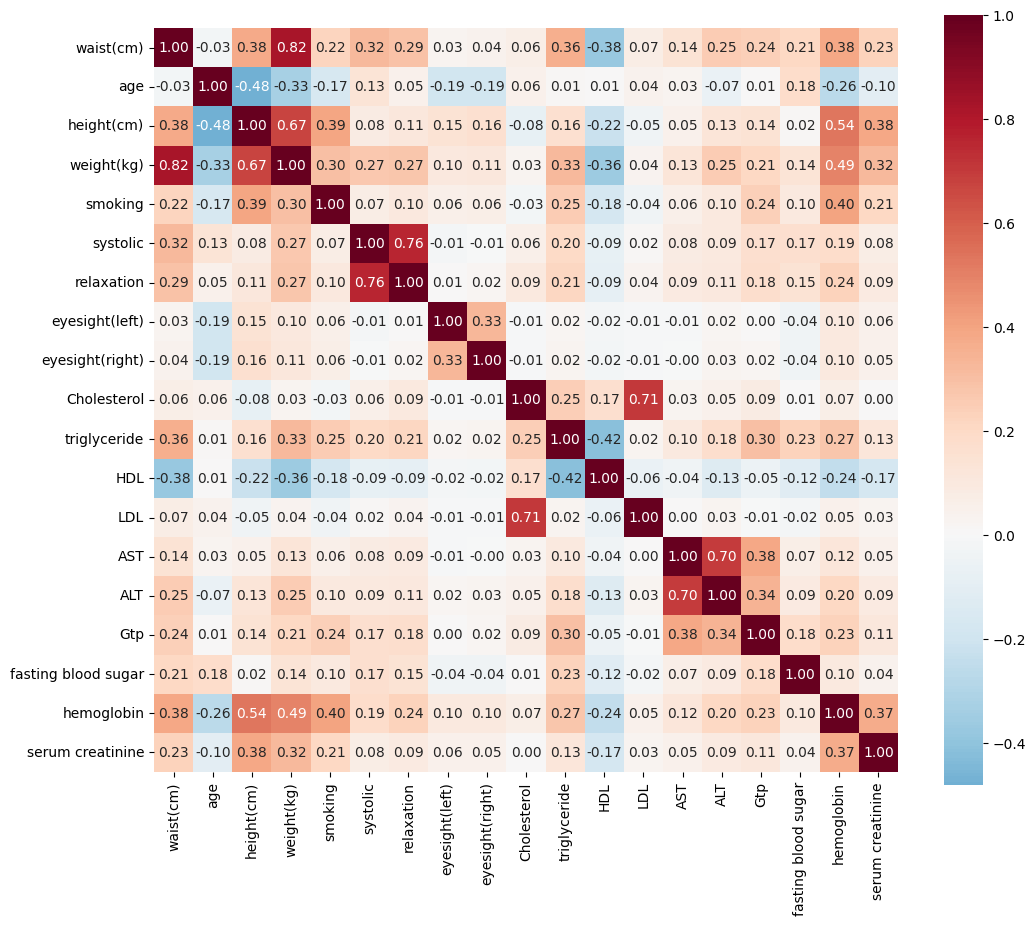

In [43]:
# Pearson
df_cardinal = df[cardinal_features]

corr_pearson = df_cardinal.corr(method='pearson')

plt.figure(figsize=(12, 10))

sns.heatmap(corr_pearson, annot=True, cmap='RdBu_r', center=0, 
            fmt='.2f', square=True)

plt.show()

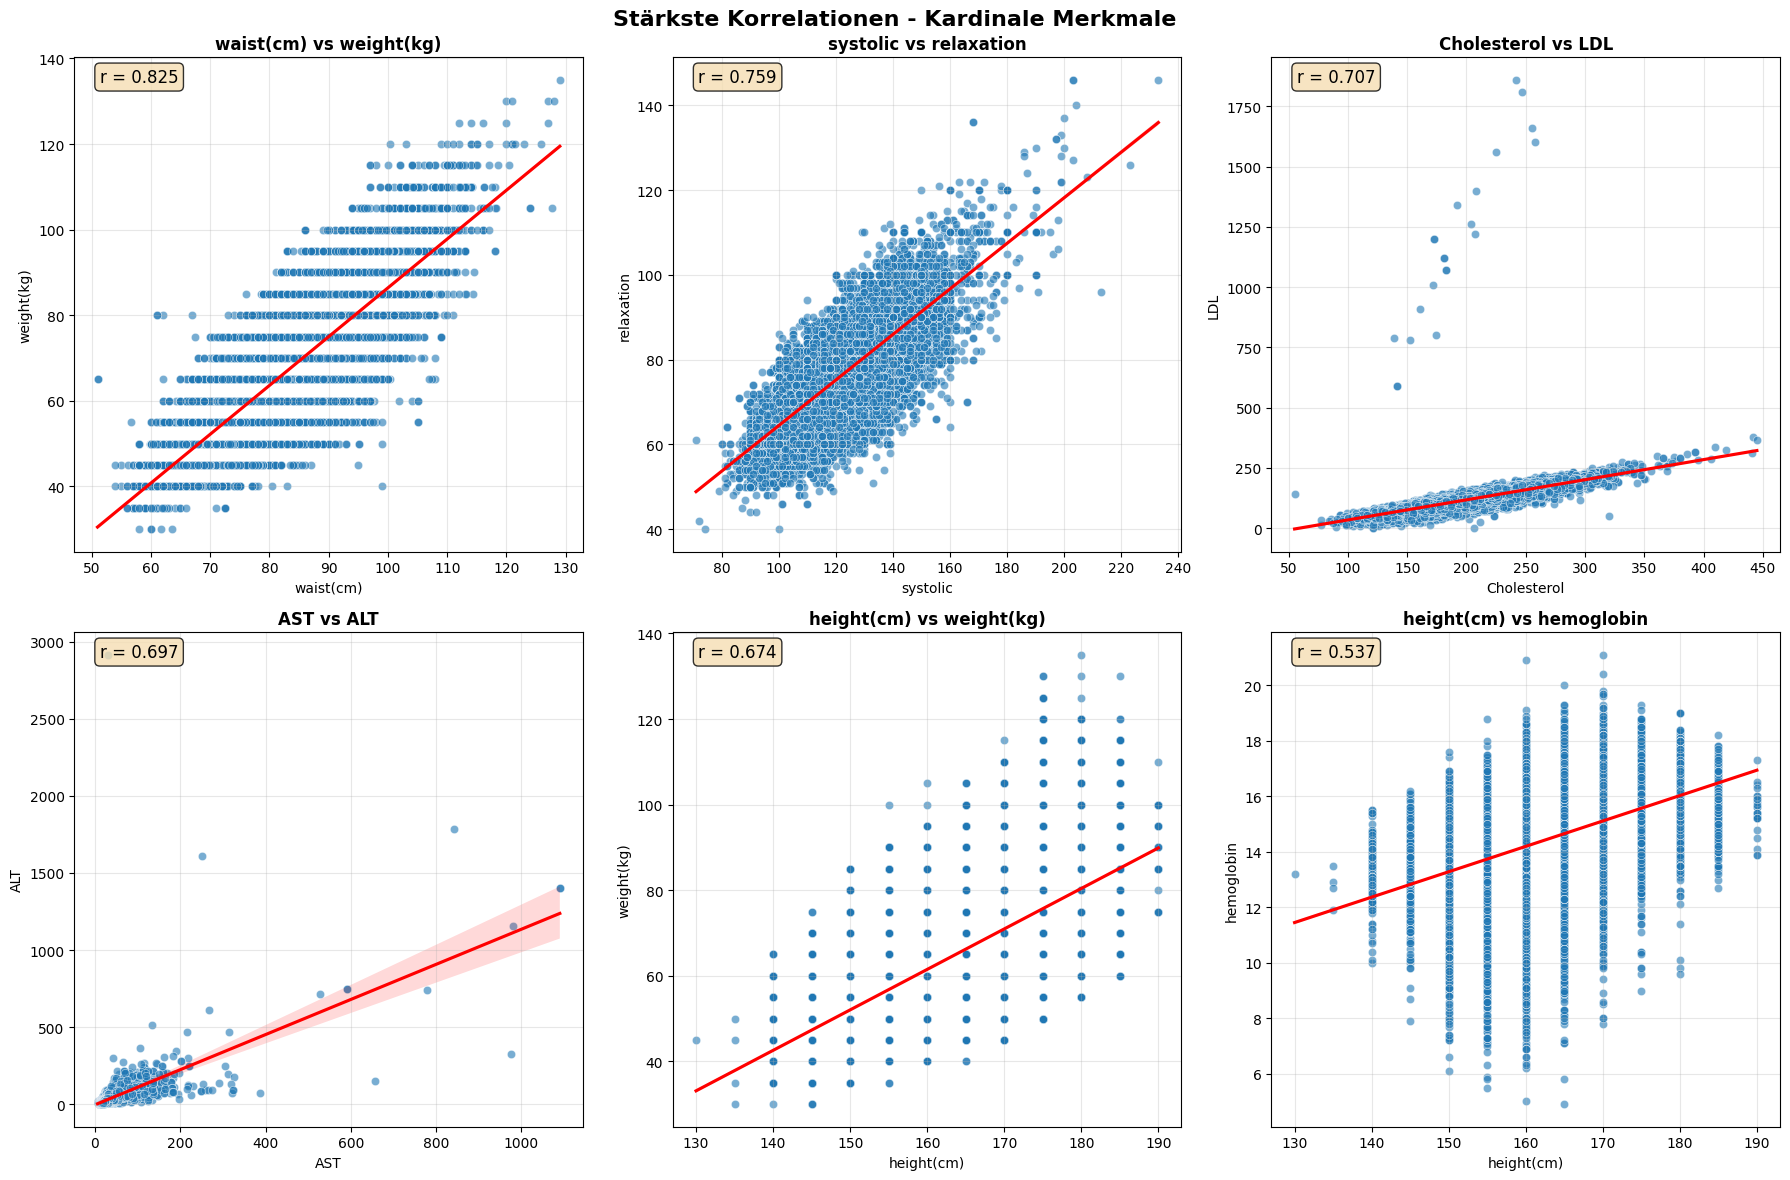

In [47]:
# Bessere Visualisierungen der stärksten korrelierenden Merkmale

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

correlations_to_plot = [
    ('waist(cm)', 'weight(kg)', 0.825),
    ('systolic', 'relaxation', 0.759),
    ('Cholesterol', 'LDL', 0.707),
    ('AST', 'ALT', 0.697),
    ('height(cm)', 'weight(kg)', 0.674),
    ('height(cm)', 'hemoglobin', 0.537)
]

for i, (var1, var2, corr) in enumerate(correlations_to_plot):
    sns.scatterplot(data=df, x=var1, y=var2, alpha=0.6, ax=axes[i])
    sns.regplot(data=df, x=var1, y=var2, scatter=False, 
                color='red', ax=axes[i])
    
    axes[i].text(0.05, 0.95, f'r = {corr:.3f}', 
                transform=axes[i].transAxes, fontsize=12, 
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    axes[i].set_title(f'{var1} vs {var2}', fontsize=12, fontweight='bold')
    axes[i].grid(True, alpha=0.3)

plt.suptitle('Stärkste Korrelationen - Kardinale Merkmale', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### Korrelationen mit der Zielvariablen

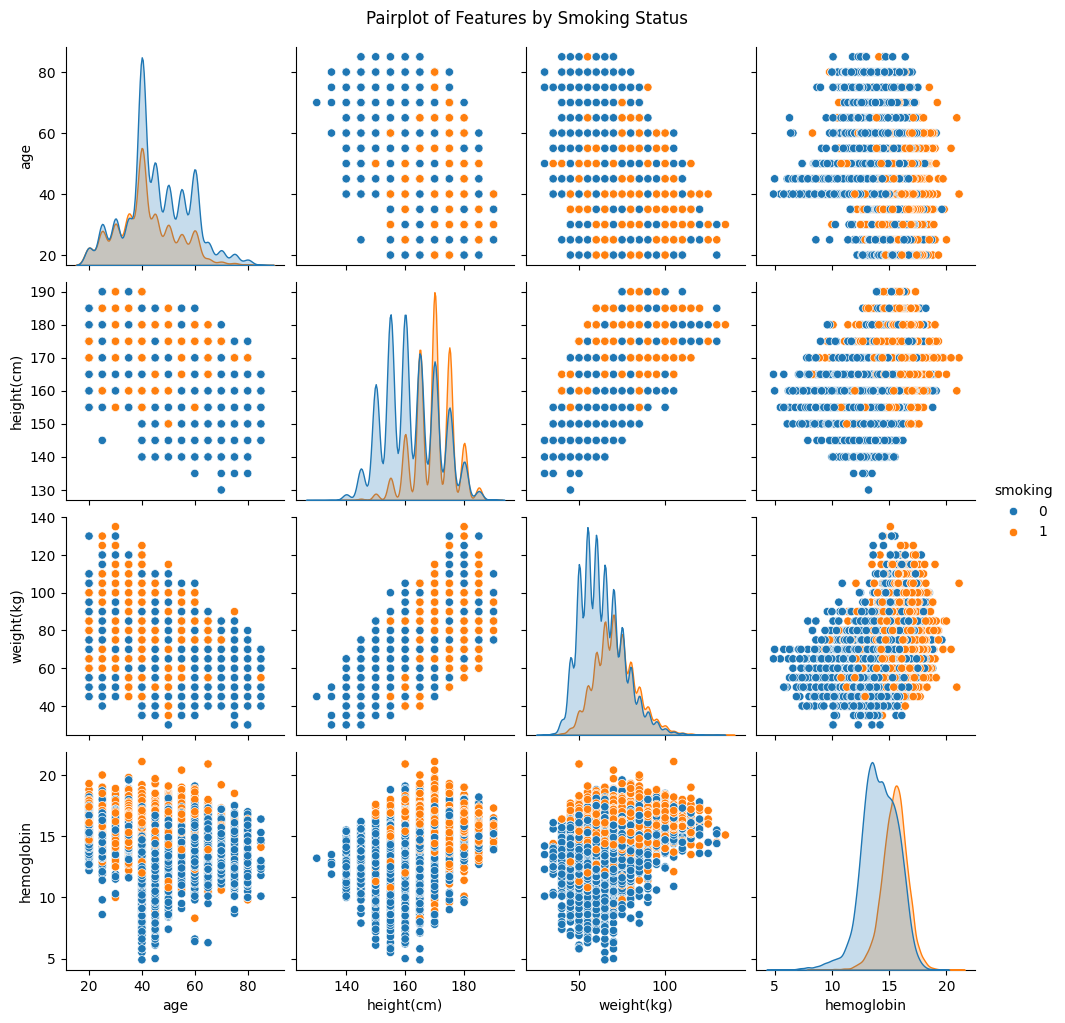

In [37]:
# Pairplot 
sns.pairplot(df, hue='smoking', vars=['age', 'height(cm)', 'weight(kg)', 'hemoglobin'])
plt.suptitle('Pairplot of Features by Smoking Status', y=1.02)
plt.show()

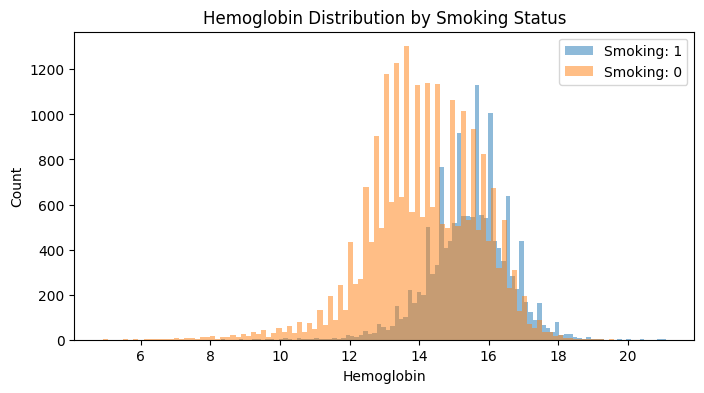

In [38]:
# Hemoglobin - Smoking
plt.figure(figsize=(8, 4))
for status in df['smoking'].unique():
    subset = df[df['smoking'] == status]
    plt.hist(subset['hemoglobin'], bins=100, alpha=0.5, label=f'Smoking: {status}')
plt.title('Hemoglobin Distribution by Smoking Status')
plt.xlabel('Hemoglobin')
plt.ylabel('Count')
plt.legend()
plt.show()

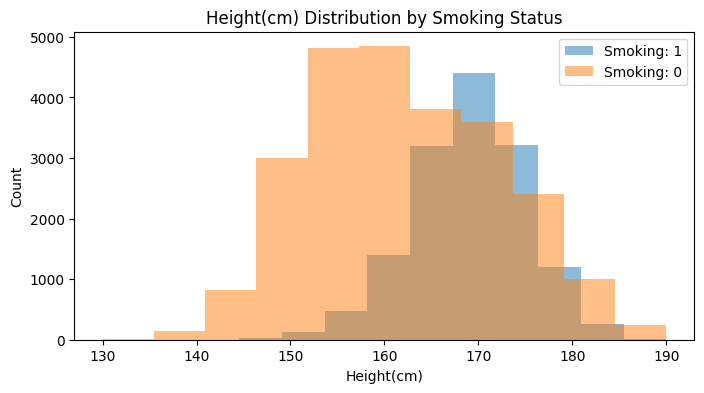

In [39]:
# Height - Smoking
plt.figure(figsize=(8, 4))
for status in df['smoking'].unique():
    subset = df[df['smoking'] == status]
    plt.hist(subset['height(cm)'], bins=11, alpha=0.5, label=f'Smoking: {status}')
plt.title('Height(cm) Distribution by Smoking Status')
plt.xlabel('Height(cm)')
plt.ylabel('Count')
plt.legend()
plt.show()

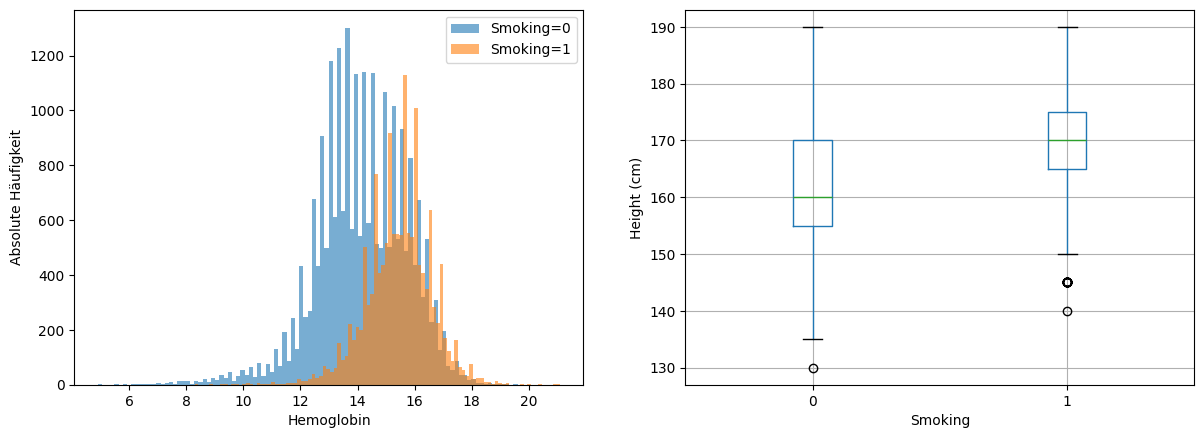

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for label, group in df.groupby('smoking'):
    axes[0].hist(group['hemoglobin'], bins=100, alpha=0.6, label=f'Smoking={label}')
axes[0].set_xlabel('Hemoglobin')
axes[0].set_ylabel('Absolute Häufigkeit')
axes[0].legend()

df.boxplot(column='height(cm)', by='smoking', ax=axes[1])
axes[1].set_xlabel('Smoking')
axes[1].set_ylabel('Height (cm)')
axes[1].set_title('')
axes[1].set_xticklabels([0, 1])
axes[1].get_figure().suptitle('')

plt.show()

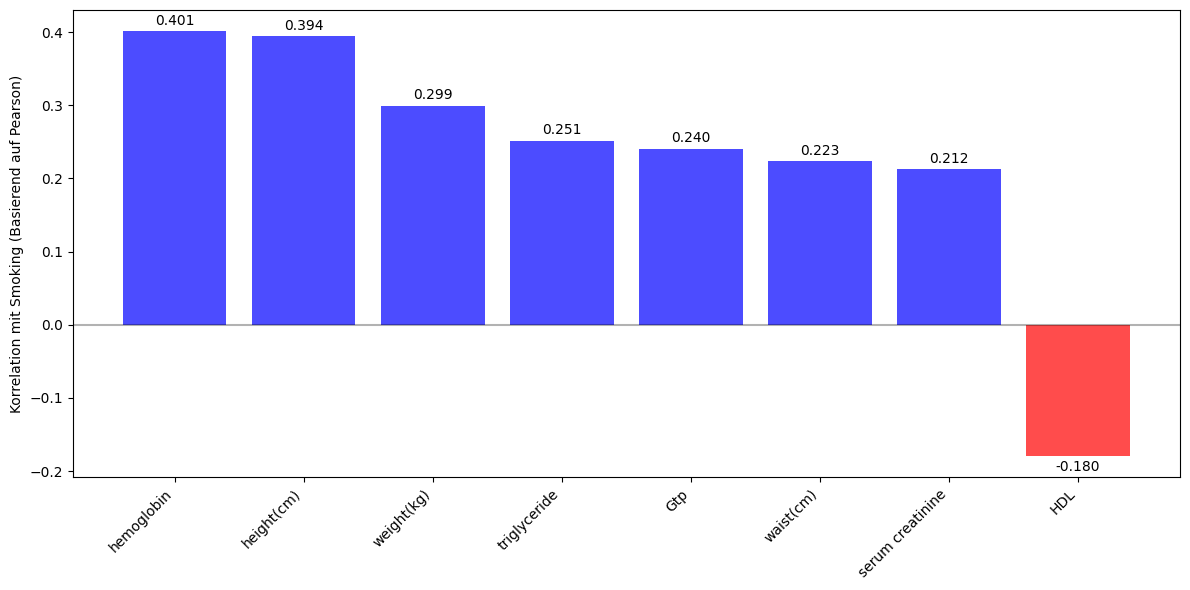

In [53]:
# Weitere Merkmale - Smoking
smoking_correlations = []
for feature in cardinal_features:
    if feature != 'smoking':
        corr_val = df[feature].corr(df['smoking'])
        smoking_correlations.append((feature, corr_val))

smoking_correlations.sort(key=lambda x: abs(x[1]), reverse=True)
features_for_smoking = [item[0] for item in smoking_correlations[:8]] 
corr_values = [item[1] for item in smoking_correlations[:8]]

plt.figure(figsize=(12, 6))
colors = ['red' if x < 0 else 'blue' for x in corr_values]
bars = plt.bar(range(len(features_for_smoking)), corr_values, color=colors, alpha=0.7)

plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.ylabel('Korrelation mit Smoking (Basierend auf Pearson)')
plt.xticks(range(len(features_for_smoking)), features_for_smoking, rotation=45, ha='right')

# Werte auf Balken anzeigen
for bar, value in zip(bars, corr_values):
    plt.text(bar.get_x() + bar.get_width()/2, 
             bar.get_height() + (0.005 if value > 0 else -0.005), 
             f'{value:.3f}', ha='center', va='bottom' if value > 0 else 'top')

plt.tight_layout()
plt.show()

### Spearman

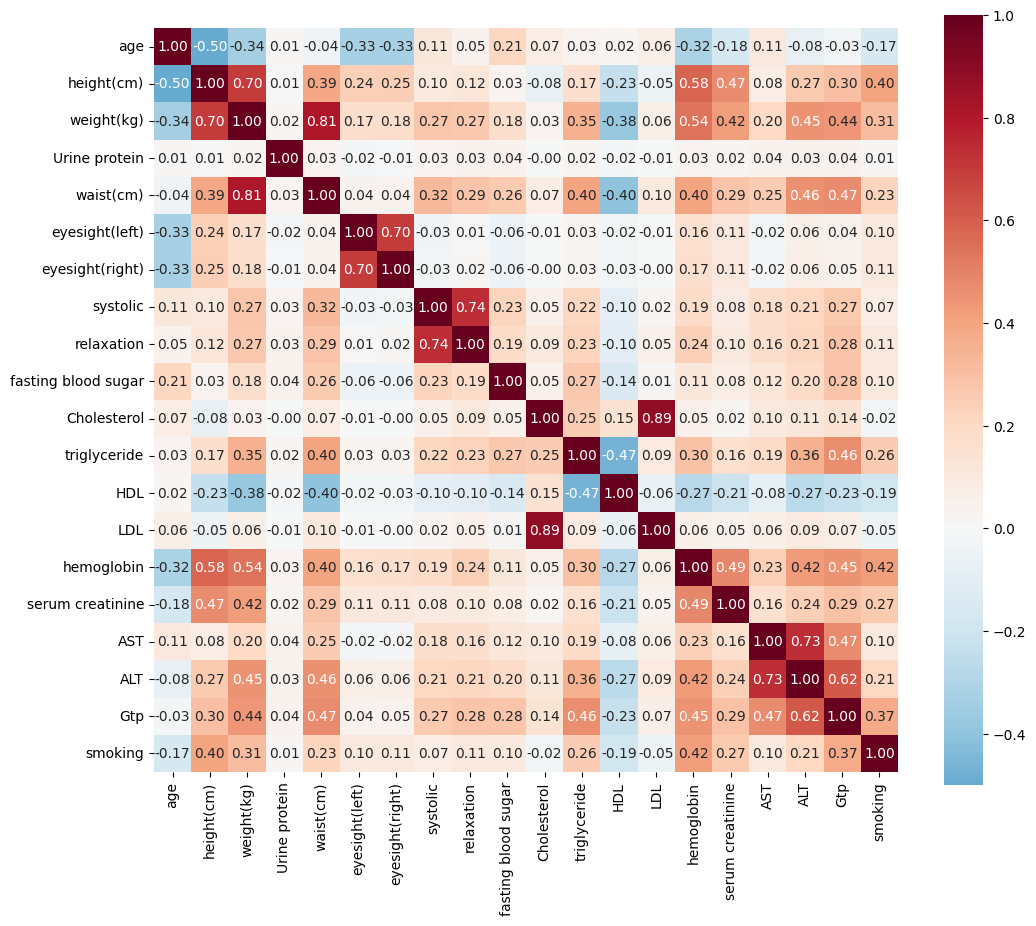

In [54]:
ordinal_extended_features = [
    "age", "height(cm)", "weight(kg)", "Urine protein", "waist(cm)",
    "eyesight(left)", "eyesight(right)", "systolic", "relaxation",
    "fasting blood sugar", "Cholesterol", "triglyceride", "HDL", "LDL",
    "hemoglobin", "serum creatinine", "AST", "ALT", "Gtp", "smoking"
]

df_ordinal_extended = df[ordinal_extended_features]

# Spearman-Korrelation berechnen
corr_spearman = df_ordinal_extended.corr(method='spearman')

plt.figure(figsize=(12, 10))

sns.heatmap(corr_spearman, annot=True, cmap='RdBu_r', center=0, 
            fmt='.2f', square=True)

plt.show()

### Cramer

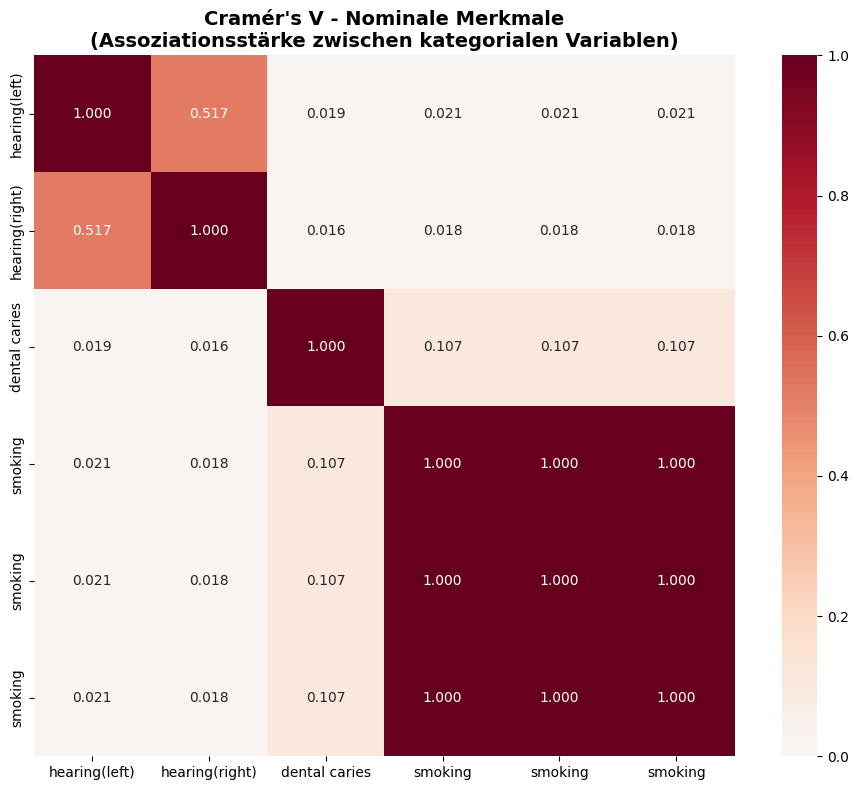

In [60]:
nominal_extended_features = nominal_features + ["smoking"]

def cramers_v_corrected(x, y):
    """Berechnet Cramér's V mit Bias-Korrektur"""
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    
    if n == 0:
        return 0
    
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    
    denominator = min((kcorr - 1), (rcorr - 1))
    if denominator <= 0:
        return 0
    
    return np.sqrt(phi2corr / denominator)

cramers_results = pd.DataFrame(
    np.zeros((len(nominal_extended_features), len(nominal_extended_features))),
    index=nominal_extended_features,
    columns=nominal_extended_features
)

for col1 in nominal_extended_features:
    for col2 in nominal_extended_features:
        if col1 == col2:
            cramers_results.loc[col1, col2] = 1.0
        else:
            cramers_results.loc[col1, col2] = cramers_v_corrected(df[col1], df[col2])
            
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_results, annot=True, cmap="RdBu_r", fmt=".3f", 
            square=True, center=0, vmin=0, vmax=1)
plt.title("Cramér's V - Nominale Merkmale\n(Assoziationsstärke zwischen kategorialen Variablen)", 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Benfords Law Factory

In [ ]:
benford_freq = np.log10(1 + 1 / np.arange(1, 10))

for col in df.columns:
    if df[col].dtype.kind in 'biufc':  # numeric columns only
        values = df[col].dropna().astype(str)
        leading_digits = values.str.lstrip('0').str.extract(r'^(\d)').dropna()[0].astype(int)
        observed_counts = leading_digits.value_counts().sort_index()
        observed_freq = observed_counts / observed_counts.sum()

        plt.figure(figsize=(8, 4))
        plt.bar(observed_freq.index, observed_freq.values, alpha=0.7, label='Tatsächliche Verteilung')
        plt.plot(np.arange(1, 10), benford_freq, 'ro-', label="Benford's Law")
        plt.xlabel('Führende Ziffer')
        plt.ylabel('Rel. Häufigkeit')
        # plt.title(f"Leading Digit Distribution vs Benford's Law ('{col}')")
        plt.legend()
        plt.show()
